In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from textwrap import TextWrapper

#some settings
sns.set_palette('twilight_shifted_r')

In [2]:
import datetime

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Scaler & Classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
df_model = pd.read_csv('data/TransformedTelcoCustomerChurn.csv')
df_model

,tenure,MonthlyCharges,TotalCharges,servicesCount,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,...,StreamingTV,StreamingMovies,IS_DSL,IS_FiberOptic,C_MonthToMonth,C_OneYear,PM_BankTransfer,PM_ElectronicCheck,PM_MailedCheck,Churn
0,1,29.85,29.85,2,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,34,56.95,1889.50,4,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,2,53.85,108.15,4,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,1
3,45,42.30,1840.75,4,0,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
4,2,70.70,151.65,2,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,8,0,1,1,1,1,1,...,1,1,1,0,0,1,0,0,1,0
7028,72,103.20,7362.90,7,0,1,1,1,1,0,...,1,1,0,1,0,1,0,0,0,0
7029,11,29.60,346.45,2,0,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
7030,4,74.40,306.60,3,1,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,1


In [4]:
X = df_model.drop(columns = ['Churn'])
y = df_model['Churn'].copy()

In [5]:
# Train, Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
#gridSearch scoring, equal for all the classifier used foward
scores = {'f1_binary': make_scorer(f1_score, average='binary'),'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

In [7]:
results = pd.DataFrame(columns=['classifier','score','value'])

## Random Forest Classifier
print('> Random Forest Classifier')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__n_estimators': [32,64,100],
    'clf__max_depth': [8]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Random Forest','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Random Forest','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Random Forest','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Random Forest','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
bestAUC = auc(false_positive_rate, true_positive_rate)
bestModelName = 'Random Forest Classifier'
bestModel = cv

print('> Random Forest Classifier fitted with success')


## Gradient-Boosted Classifier
print('> Gradient-Boosted Classifier')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__n_estimators': [32,64,100],
    'clf__min_samples_leaf': [0.2]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'Gradient-Boosted Classifier'
    bestModel = cv
    bestAUC = currentAUC

print('> Gradient-Boosted Classifier fitted with success')


## Desicion Tree Classifier
print('> Desicion Tree Classifier')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__max_depth': [1,2,3,4,5,6,7,8],
    'clf__min_samples_split': [0.1,0.2,0.3,0.4],
    'clf__min_samples_leaf': [0.2]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Desicion Tree','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Desicion Tree','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Desicion Tree','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Desicion Tree','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'Desicion Tree Classifier'
    bestModel = cv
    bestAUC = currentAUC
    
print('> Desicion Tree Classifier fitted with success')


## K-Neighbors Classifier
print('> K-Neighbors Classifier')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__n_neighbors': [4,5,6,7],
    'clf__p': [1]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['K-Neighbors','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['K-Neighbors','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['K-Neighbors','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['K-Neighbors','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'K-Neighbors Classifier'
    bestModel = cv
    bestAUC = currentAUC
    
print('> K-Neighbors Classifier fitted with success')


## Logistic Regression
print('> Logistic Regression')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__solver': ['newton-cg','lbfgs','liblinear'],
    'clf__max_iter': [1000]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Logistic Regression','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Logistic Regression','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Logistic Regression','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Logistic Regression','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'Logistic Regression'
    bestModel = cv
    bestAUC = currentAUC

print('> Logistic Regression fitted with success')
print('All models fitted')

> Random Forest Classifier
> Random Forest Classifier fitted with success
> Gradient-Boosted Classifier
> Gradient-Boosted Classifier fitted with success
> Desicion Tree Classifier
> Desicion Tree Classifier fitted with success
> K-Neighbors Classifier
> K-Neighbors Classifier fitted with success
> Logistic Regression
> Logistic Regression fitted with success
All models fitted


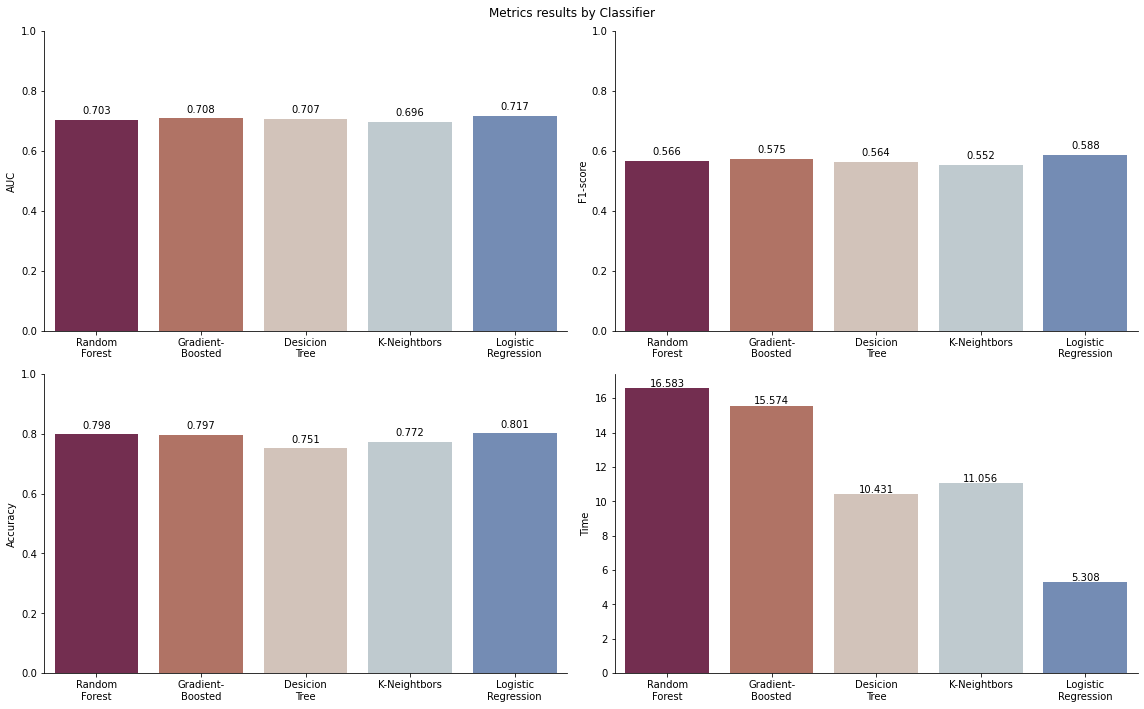

In [8]:
#Display the results

#convert results from string to float
results['value'] = results['value'].astype(float)

fig, ax = plt.subplots(2,2, figsize=(16,10)) 

ax[0][0] = sns.barplot(x="classifier",y="value",data=results[results['score']=='AUC'], ax=ax[0][0])
ax[0][1] = sns.barplot(x="classifier",y="value",data=results[results['score']=='F1-score'], ax=ax[0][1])
ax[1][0] = sns.barplot(x="classifier",y="value",data=results[results['score']=='Accuracy'], ax=ax[1][0])
ax[1][1] = sns.barplot(x="classifier",y="value",data=results[results['score']=='Time'], ax=ax[1][1])

#scaling y axis
ax[0][0].set(ylim=(0, 1))
ax[0][1].set(ylim=(0, 1))
ax[1][0].set(ylim=(0, 1))

#adding column labels in each chart
for p in ax[0][0].patches:
    ax[0][0].text(x = p.get_x()+0.4, y = p.get_height()+0.02, s = '{:.3f}'.format(p.get_height()), ha = 'center')
for p in ax[0][1].patches:
    ax[0][1].text(x = p.get_x()+0.4, y = p.get_height()+0.02, s = '{:.3f}'.format(p.get_height()), ha = 'center')
for p in ax[1][0].patches:
    ax[1][0].text(x = p.get_x()+0.4, y = p.get_height()+0.02, s = '{:.3f}'.format(p.get_height()), ha = 'center')
for p in ax[1][1].patches:
    ax[1][1].text(x = p.get_x()+0.4, y = p.get_height()+0.08, s = '{:.3f}'.format(p.get_height()), ha = 'center')

#Wrapping the text on x axis
classifiers = ['Random Forest','Gradient-Boosted','Desicion Tree','K-Neightbors','Logistic Regression']
wrapper = TextWrapper(width=12,break_long_words=True,break_on_hyphens=True)
ax[0][0].set_xticklabels([wrapper.fill(text) for text in classifiers])
ax[0][1].set_xticklabels([wrapper.fill(text) for text in classifiers])
ax[1][0].set_xticklabels([wrapper.fill(text) for text in classifiers])
ax[1][1].set_xticklabels([wrapper.fill(text) for text in classifiers])

#Remove spines
for i in range(2):
    for j in range(2):
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        
#Setting axis main labels
ax[0][0].set(xlabel='', ylabel='AUC')
ax[0][1].set(xlabel='', ylabel='F1-score')
ax[1][0].set(xlabel='', ylabel='Accuracy')
ax[1][1].set(xlabel='', ylabel='Time')

fig.suptitle("Metrics results by Classifier", position=(.5,0.98))
fig.tight_layout()

#Save plot
plt.savefig('images/3_1_metrics_results.png', dpi=100)

In [9]:
print('Best Model: {}'.format(bestModelName))
print('Best Model Parameters: {}'.format(bestModel.best_params_))

Best Model: Logistic Regression
Best Model Parameters: {'clf__max_iter': 1000, 'clf__solver': 'liblinear', 'scaler__with_mean': False, 'scaler__with_std': True}


In [10]:
## Runing the best model with the best parameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
pipeline.set_params(**bestModel.best_params_)
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
feature_importance = pd.DataFrame({'feature':list(X_train.columns),'weight':list(np.ndarray.flatten(np.exp(model.steps[1][1].coef_)))})
feature_importance.sort_values(by='weight',ascending=False,inplace=True)

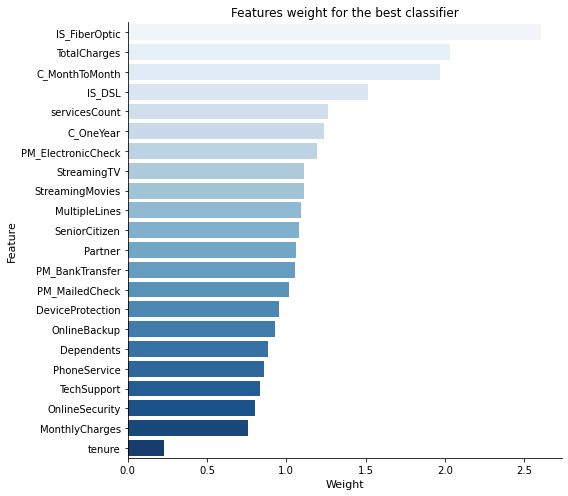

In [12]:
#Display the results
fig, ax = plt.subplots(1,1, figsize=(8,7)) 

ax = sns.barplot(x='weight',y='feature',data=feature_importance,palette='Blues')

#Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#Resize labels
ax.set_xlabel('Weight',fontsize=11)
ax.set_ylabel('Feature',fontsize=11)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10) 

ax.axes.set_title("Features weight for the best classifier",fontsize=12)
fig.tight_layout()

#Save plot
plt.savefig('images/3_2_features_weights.png', dpi=80)